# 2015104013 김형민 머신러닝개론 과제 2-1번. 다항 회귀

### 기본 import 및 설정

In [2]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

import tensorflow as tf
from tensorflow import keras

### sklearn 데이터셋 불러오기 및 Train, Test set

In [3]:
# 캘리포니아 주택 데이터셋을 로드하여 나누고 스케일을 바꾼다. 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler ## 바꾼 Scale

housing = fetch_california_housing()

# 훈련 세트와 테스트 세트로 나눈다. 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = MinMaxScaler() # 스케일러 변경
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
np.random.seed(42)
tf.random.set_seed(42)

### Model Set

In [5]:
# Sequential
# Dense(30)
# 활성화 함수: ReLU
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


# 비용함수: MSE
# Optimizer: SGD
# epoch: 20
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 970us/step - loss: 1.9342 - val_loss: 1.1652
Epoch 2/20
363/363 [==============================] - 0s 758us/step - loss: 1.1706 - val_loss: 1.1198
Epoch 3/20
363/363 [==============================] - 0s 766us/step - loss: 1.1226 - val_loss: 1.0718
Epoch 4/20
363/363 [==============================] - 0s 832us/step - loss: 1.0766 - val_loss: 1.0269
Epoch 5/20
363/363 [==============================] - 0s 796us/step - loss: 1.0316 - val_loss: 0.9817
Epoch 6/20
363/363 [==============================] - 0s 777us/step - loss: 0.9879 - val_loss: 0.9397
Epoch 7/20
363/363 [==============================] - 0s 793us/step - loss: 0.9453 - val_loss: 0.8971
Epoch 8/20
363/363 [==============================] - 0s 766us/step - loss: 0.9047 - val_loss: 0.8571
Epoch 9/20
363/363 [==============================] - 0s 763us/step - loss: 0.8663 - val_loss: 0.8200
Epoch 10/20
363/363 [==============================] - 0s 766us/step - loss: 0.829

### Graph 및 결과값 확인

In [6]:
import pandas as pd

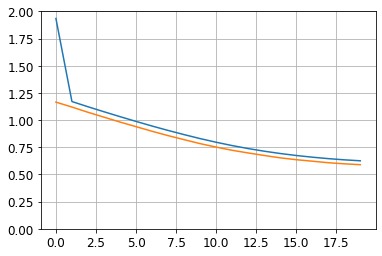

In [7]:
# 그래프 표출: 훈련의 비용함수와 테스트의 비용함수를 epoch에 대하여 그래프로 나타낸다.
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 2)
plt.show()

In [8]:
# 최종적으로 예측된 주택 가격을 표출한다. 
y_pred

array([[1.1232022],
       [1.6744394],
       [2.3415997]], dtype=float32)